<h2><center> Welcome to the Cryptojacking Detection Challenge </h2></center>
<figure>
<!-- <center><img src ="https://drive.google.com/uc?export=view&id=1afxycLZz1AovI0MjqEIiXyziEVWnUkNG" width = "750" height = '500' alt="Cryptojacking Detection Challenge"/> -->

*About the problem*
> Cryptojacking is a cyber-attack utilizing malicious scripts similar to those from large cryptocurrency houses to illegally mine data without users being aware. These attacks are stealthy and difficult to detect or analyze, often leading to decreased computing speeds for users as well as crashes due to straining of computational resources.


*The objective of this challenge is*:
> classify network activity from various websites as either cryptojacking or not based on features related to both network-based and host-based data.



## Table of contents:

1. [Importing Libraries](#Libraries)
2. [Loading Data](#Data)
3. [Statistical Summaries](#Statistics)
4. [Missing Values and Duplicates](#Missing)
5. [Target Distribution](#Engineering)
6. [Features Engineering](#FeaturesEngineering)
7. [Preprocess](#Preprocess)
7. [Modeling](#Modeling)
8. [Submission](#submit)

<a name="Libraries"></a>
## 1. Importing Libraries


In [1]:
SEED = 1221
# Import libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

<a name="Data"></a>
## 2. Loading Data

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("esperance01/indabax-benin-republic-hackathon")

print("Path to dataset files:", path)

!mv "$path" '/content/'
!mv "1" "dataset"

print("The dataset is ready now !")

100%|██████████| 932k/932k [00:00<00:00, 70.9MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/esperance01/indabax-benin-republic-hackathon/versions/1


The dataset is ready now !


In [3]:
# Load files
train = pd.read_csv('dataset/Train.csv')
test = pd.read_csv('dataset/Test.csv')
samplesubmission = pd.read_csv('dataset/SampleSubmission.csv')

In [4]:
# Preview train dataset
train.head()

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Label
0,ID_4W8AP96UO6,114.798900,3790.450939,28.0,0.427078,6.162365,21.220403,58.492773,63.959387,0.621206,0.521813,24.624612,0.0,1001.533430,27.190843,1
1,ID_UD3TM0ZYND,14.154240,5182.451722,28.0,0.138876,5.399498,0.000000,22.886762,29.508369,0.422183,0.444403,0.044440,0.0,1089.121009,30.150941,0
2,ID_XAG1HC0HWM,0.044444,120.821253,28.0,0.000000,1.577765,0.000000,11.733239,12.888786,0.177776,0.155554,0.044444,0.0,322.464081,28.163287,0
3,ID_CEXD05IR09,31.369916,127228.251100,31.0,0.523750,15.981107,5.356671,602.125436,6976.986795,3.311801,5.756755,5.623394,0.0,12015.169690,34.204404,0
4,ID_X6E97FT8IF,5.046181,1091.620117,25.0,0.069468,1.356022,0.000000,16.138887,13.271234,0.155609,0.133379,0.000000,0.0,550.989619,31.466889,1


In [5]:
# Preview test dataset
test.head()

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius
0,ID_L7RNFK5JC9,32.709430,121124.141400,30.407359,0.496719,3.999064,0.000000,335.565884,737.338490,1.844013,1.910664,0.311038,0.0,726.318848,20.008686
1,ID_KUTY5K1G5F,2.065990,2029.713475,29.000000,0.000000,3.665467,0.000000,63.845771,41.119875,0.733093,0.577589,0.044430,0.0,385.473839,33.015399
2,ID_H6PJWKU831,114.524684,3888.550764,28.000000,0.486075,0.777719,0.199985,11.354698,11.332477,0.177764,0.133323,0.000000,0.0,504.828540,30.091141
3,ID_DNQXNVTXHE,27.036810,5581.324782,25.000000,0.314968,1.789015,0.000000,44.297028,13.430214,0.302369,0.125987,0.000000,0.0,465.950312,22.211252
4,ID_8CRTF1BJOD,1.177267,176.634467,28.000000,0.000000,1.710369,0.000000,88.161746,57.508380,0.888503,0.777440,0.000000,0.0,771.665166,31.032570


In [6]:
# Preview sample submission file
samplesubmission.head()

,ID,Target
0,ID_L7RNFK5JC9,0
1,ID_KUTY5K1G5F,0
2,ID_H6PJWKU831,0
3,ID_DNQXNVTXHE,0
4,ID_8CRTF1BJOD,0


In [7]:
# Check size and shape of datasets
train.shape, test.shape, samplesubmission.shape

((8908, 16), (3818, 15), (3818, 2))

In [8]:
var_def = pd.read_csv('dataset/Variable_Definitions.csv')
var_def

,Feature,Description
0,I/O Data Operations,Speed at which the process is issuing read and...
1,I/O Data Bytes,Speed at which the process is reading and writ...
2,Number of subprocesses,Number of sub-processes that are currently act...
3,Time on processor,"The total time, in seconds, that a process has..."
4,Disk Reading/sec,Speed of disk reading operations
5,Disc Writing/sec,Speed of writing operations to disk
6,Confirmed byte radius,The ratio of Memory/Bytes committed and Memory...
7,Pages Read/sec,Speed rate at which the disk was read in order...
8,Pages Input/sec,Speed at which pages are written to disk to fr...
9,Page Errors/sec,This is the average number of pages with fault...


<a name="Statistics"></a>
## 3. Statistical Summaries

In [9]:
# Train statistical summary
train.describe(include = 'all')

,ID,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Label
count,8908,8908.000000,8.908000e+03,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8.908000e+03,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000,8908.000000
unique,8908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ID_4W8AP96UO6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,36.429205,1.135564e+05,29.811900,0.496405,5.353260,1.046153,559.546628,1.655804e+04,4.795485,12.625792,0.988036,0.004177,2779.178084,28.436192,0.269870
std,NaN,75.884647,4.896846e+05,5.691411,1.593626,19.286690,15.667814,1939.745234,9.042803e+04,20.797585,61.246541,12.495768,0.082923,4996.003166,3.970140,0.443917
min,NaN,0.000000,0.000000e+00,1.000000,0.000000,0.044459,0.000000,1.197890,1.554938e+00,0.022183,0.022183,0.000000,0.000000,16.143987,18.057942,0.000000
25%,NaN,1.394404,8.136318e+02,27.000000,0.000000,0.755629,0.000000,33.843800,2.737770e+01,0.399999,0.333225,0.000000,0.000000,351.620535,25.266134,0.000000
50%,NaN,11.613803,4.930482e+03,28.000000,0.034734,1.711077,0.000000,67.366295,8.905770e+01,0.710898,0.635705,0.022222,0.000000,682.943866,28.543826,0.000000
75%,NaN,34.494953,3.940357e+04,30.000000,0.451350,5.845619,0.022229,221.314810,5.613814e+02,1.555063,1.711155,0.088887,0.000000,1356.673217,30.969542,1.000000


<a name="Missing"></a>
## 4. Missing Values and Duplicates

In [10]:
# Check for missing values
train.isnull().sum().any(), test.isnull().sum().any()

(False, False)

In [11]:
# Check for duplicates
train.duplicated().any(), test.duplicated().any()

(False, False)

There are no missing values or duplicates

<a name="Class Distribution"></a>
## 5. Target Distribution

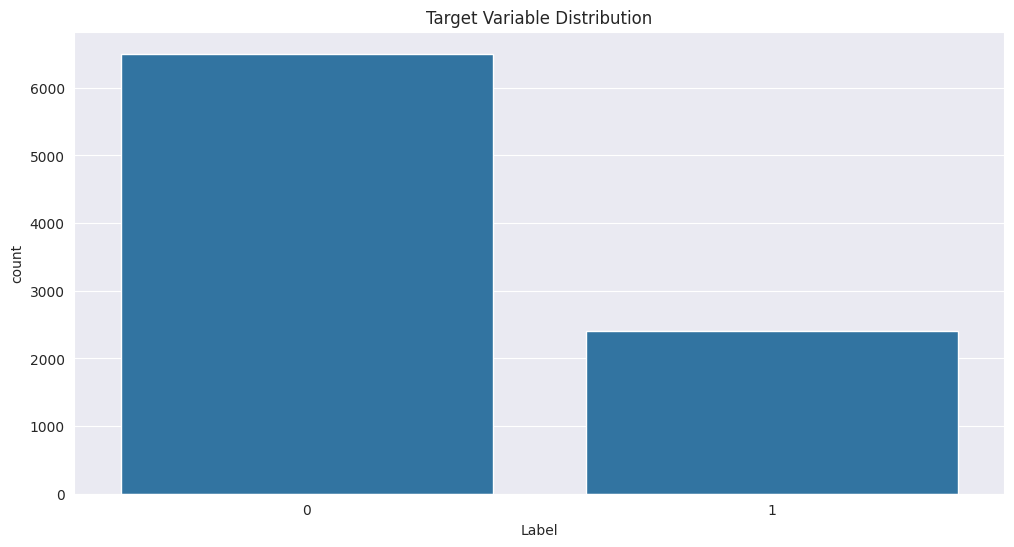

In [12]:
# A box plot showing outliers
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
sns.countplot(x = 'Label', data = train)
plt.title('Target Variable Distribution')
plt.show()

In [13]:
train['Label'].value_counts()

,count
Label,
0,6504
1,2404


There is a class imbalance in our dataset

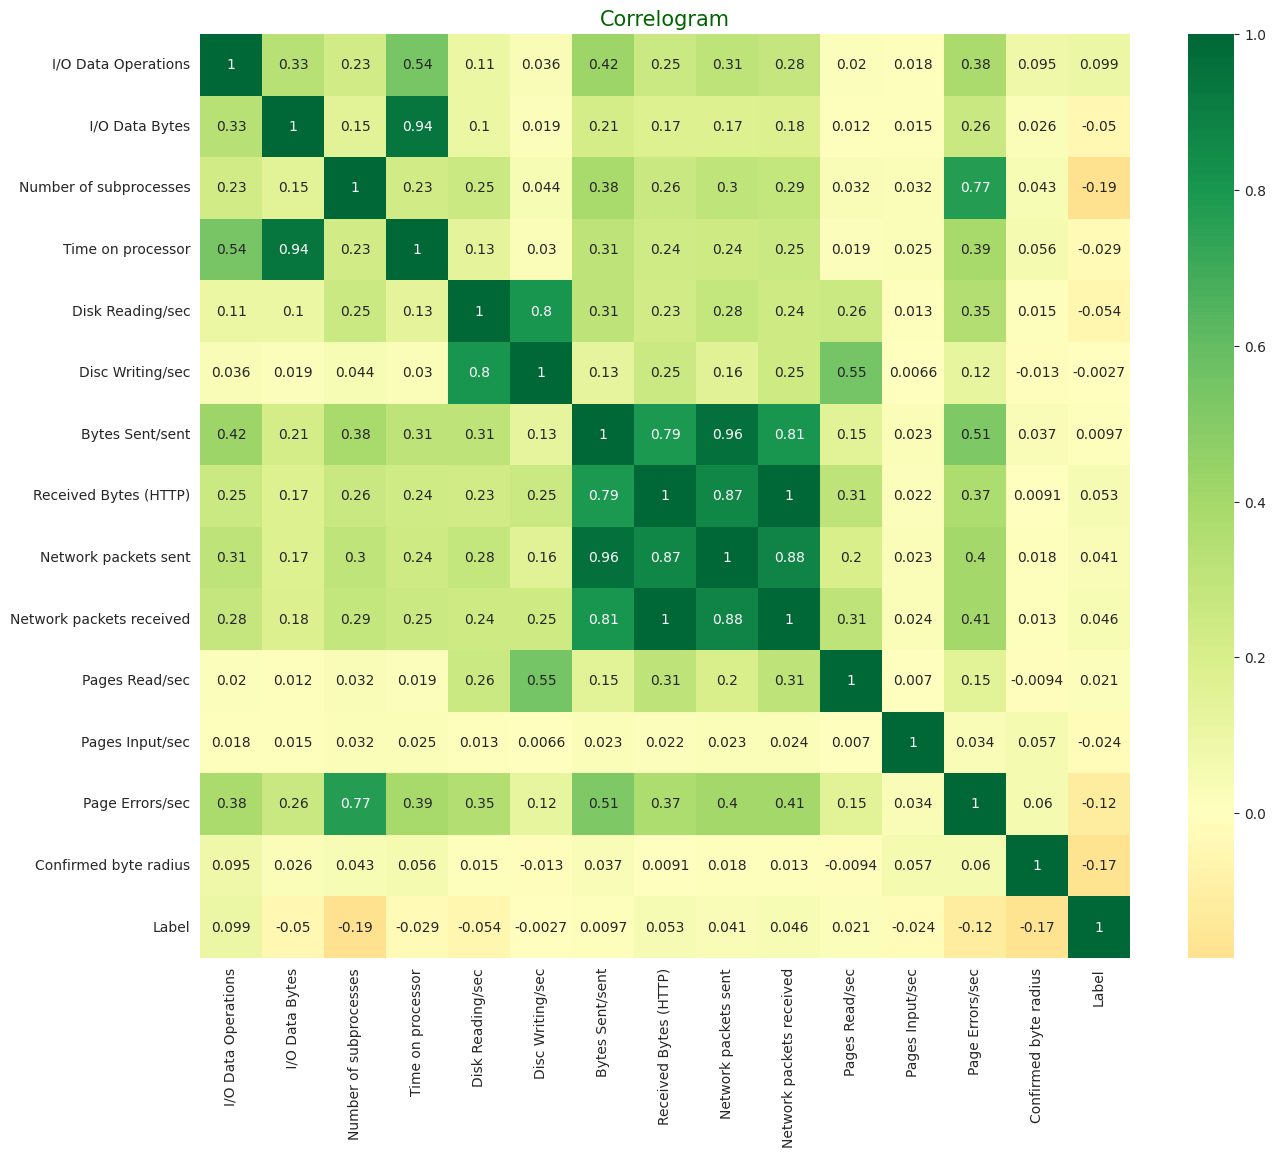

In [14]:
# Plotting a heatmap to show correlations between variables
corr = train.drop("ID",axis=1).corr()
plt.figure(figsize = (15, 12))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

Most features are not strongly correlated with the target

<a name="FeaturesEngineering"></a>
# 6. Features Engineering

In [15]:
var_def = pd.read_csv('dataset/Variable_Definitions.csv')
var_def

,Feature,Description
0,I/O Data Operations,Speed at which the process is issuing read and...
1,I/O Data Bytes,Speed at which the process is reading and writ...
2,Number of subprocesses,Number of sub-processes that are currently act...
3,Time on processor,"The total time, in seconds, that a process has..."
4,Disk Reading/sec,Speed of disk reading operations
5,Disc Writing/sec,Speed of writing operations to disk
6,Confirmed byte radius,The ratio of Memory/Bytes committed and Memory...
7,Pages Read/sec,Speed rate at which the disk was read in order...
8,Pages Input/sec,Speed at which pages are written to disk to fr...
9,Page Errors/sec,This is the average number of pages with fault...


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8908 entries, 0 to 8907
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        8908 non-null   object 
 1   I/O Data Operations       8908 non-null   float64
 2    I/O Data Bytes           8908 non-null   float64
 3   Number of subprocesses    8908 non-null   float64
 4   Time on processor         8908 non-null   float64
 5   Disk Reading/sec          8908 non-null   float64
 6   Disc Writing/sec          8908 non-null   float64
 7   Bytes Sent/sent           8908 non-null   float64
 8   Received Bytes (HTTP)     8908 non-null   float64
 9   Network packets sent      8908 non-null   float64
 10  Network packets received  8908 non-null   float64
 11  Pages Read/sec            8908 non-null   float64
 12  Pages Input/sec           8908 non-null   float64
 13  Page Errors/sec           8908 non-null   float64
 14  Confirme

In [17]:
X = train.drop(columns=['ID','Label'])
y = train['Label']

In [18]:
list(X.columns)

['I/O Data Operations',
 ' I/O Data Bytes',
 'Number of subprocesses',
 'Time on processor',
 'Disk Reading/sec',
 'Disc Writing/sec',
 'Bytes Sent/sent',
 'Received Bytes (HTTP)',
 'Network packets sent',
 'Network packets received',
 'Pages Read/sec',
 'Pages Input/sec',
 'Page Errors/sec',
 'Confirmed byte radius']

In [19]:
import numpy as np

# The following transformations are essential for creating meaningful features that could improve model performance.

for df in [X, test]:
    # 1. Page Error Read Ratio: This feature calculates the ratio of 'page_read' to 'page_error'.
    #    This can be important for identifying how often page reads result in errors.
    df["page_error_read_ratio"] = df['Pages Read/sec'] / df["Pages Input/sec"]

    # 2. Packet Bytes Sent: Calculates the ratio of bytes sent to packets sent.
    #    Helps in understanding the average packet size when sending data.
    df["packet_bytes_sent"] = df["Bytes Sent/sent"] / df['Network packets sent']

    # 3. Packet Bytes Received: Calculates the ratio of received bytes to received packets.
    #    Useful for understanding the average packet size when receiving data.
    df["packet_bytes_received"] = df["Received Bytes (HTTP)"] / df['Network packets received']

    # 4. Bytes Ratio (Received/Sent): Represents the proportion of received bytes to sent bytes.
    #    This feature is useful in network traffic analysis and detecting imbalances in received vs sent data.
    df["bytes_ratio"] = df["Received Bytes (HTTP)"] / df["Bytes Sent/sent"]

    # 5. Packets Ratio (Received/Sent): Represents the proportion of received packets to sent packets.
    #    Similar to the 'bytes_ratio', but this one is for packet counts rather than byte counts.
    df["packets_ratio"] = df["Network packets received"] / df["Network packets sent"]

    # 6. Combined Packet Byte Ratio: This feature combines both byte and packet ratios
    #    to capture a more comprehensive view of the network packet behavior.
    df["packet_byte_ratio"] = df["bytes_ratio"] * df["packets_ratio"]

    # 7. Total Byte/Packet Ratio: This feature normalizes the sum of bytes (sent and received)
    #    by the sum of packets (sent and received). It can provide insights into the overall data efficiency.
    df["total_byte_packet_ratio"] = (df["Received Bytes (HTTP)"] + df["Bytes Sent/sent"]) / (df["Network packets received"] + df["Network packets sent"])

    # 8. Disk Write/Read Ratio: Measures the ratio of disk writes to reads.
    #    A high value could indicate an unbalanced workload on disk I/O operations.
    df["disc_write_read_ratio"] = df["Disc Writing/sec"] / df["Disk Reading/sec"]

    # 9. Bytes per Disk Read: Represents the amount of data read from the disk in bytes per read operation.
    #    This can provide insights into how much data is being processed in relation to disk reads.
    df["bytes_disc_read"] = df[" I/O Data Bytes"] / df["Disk Reading/sec"]

    # 10. Processor Time per Subprocess: Measures how much processor time is used per subprocess.
    #     This can be important for performance analysis and optimization of subprocess handling.
    df["process_time_subprocess"] = df["Time on processor"] / df["Number of subprocesses"]

    # 11. Binary Data Operation Indicator : Convert the 'I/O Data Operations' to a binary feature indicating whether
    #     any operation occurred or not.
    df["data_operation_binary"] = df["I/O Data Operations"].apply(lambda x: 0 if x == 0 else 1)

    # 12. Total Operations: Calculates the total operations by multiplying 'I/O Data Operations' by processor time.
    #     Useful for estimating the overall workload.
    df["total_operations"] = df["I/O Data Operations"] * df["Time on processor"]

    # 13. Total Bytes: Similar to total operations, but calculates the total amount of data bytes processed.
    df["total_bytes"] = df[" I/O Data Bytes"] * df["Time on processor"]

    # 14. Bytes per Operation: Represents the amount of data processed per operation.
    #     This can provide insights into the efficiency of the system.
    df["bytes_per_operation"] = (df[" I/O Data Bytes"] / df["I/O Data Operations"]).fillna(0)

    # 15. Bytes per Operation per Time: A more granular feature to measure data processed per operation
    #     in relation to processor time. Helps to assess how efficient each operation is in terms of time.
    df["bytes_per_operation_time"] = (df["bytes_per_operation"] / df["Time on processor"]).fillna(0).replace(np.inf, 1e9)

    # 16. Operations per Subprocess: Measures how many operations occur per subprocess.
    #     This feature can help in understanding subprocess load.
    df["operation_per_subprocess"] = df["I/O Data Operations"] / df["Number of subprocesses"]

    # 17. Bytes per Subprocess: Measures how many bytes are processed per subprocess.
    #     This feature can give insights into the data load distributed across subprocesses.
    df["bytes_per_subprocess"] = df[" I/O Data Bytes"] / df["Number of subprocesses"]

    # Avoid 'too large ' error
    df.replace({np.inf: 1e6, -np.inf: -1e6}, inplace=True)


# Print of new features
print("New features added :")
print(X.columns)

New features added :
Index(['I/O Data Operations', ' I/O Data Bytes', 'Number of subprocesses',
       'Time on processor', 'Disk Reading/sec', 'Disc Writing/sec',
       'Bytes Sent/sent', 'Received Bytes (HTTP)', 'Network packets sent',
       'Network packets received', 'Pages Read/sec', 'Pages Input/sec',
       'Page Errors/sec', 'Confirmed byte radius', 'page_error_read_ratio',
       'packet_bytes_sent', 'packet_bytes_received', 'bytes_ratio',
       'packets_ratio', 'packet_byte_ratio', 'total_byte_packet_ratio',
       'disc_write_read_ratio', 'bytes_disc_read', 'process_time_subprocess',
       'data_operation_binary', 'total_operations', 'total_bytes',
       'bytes_per_operation', 'bytes_per_operation_time',
       'operation_per_subprocess', 'bytes_per_subprocess'],
      dtype='object')


In [20]:
len(X.columns)

31

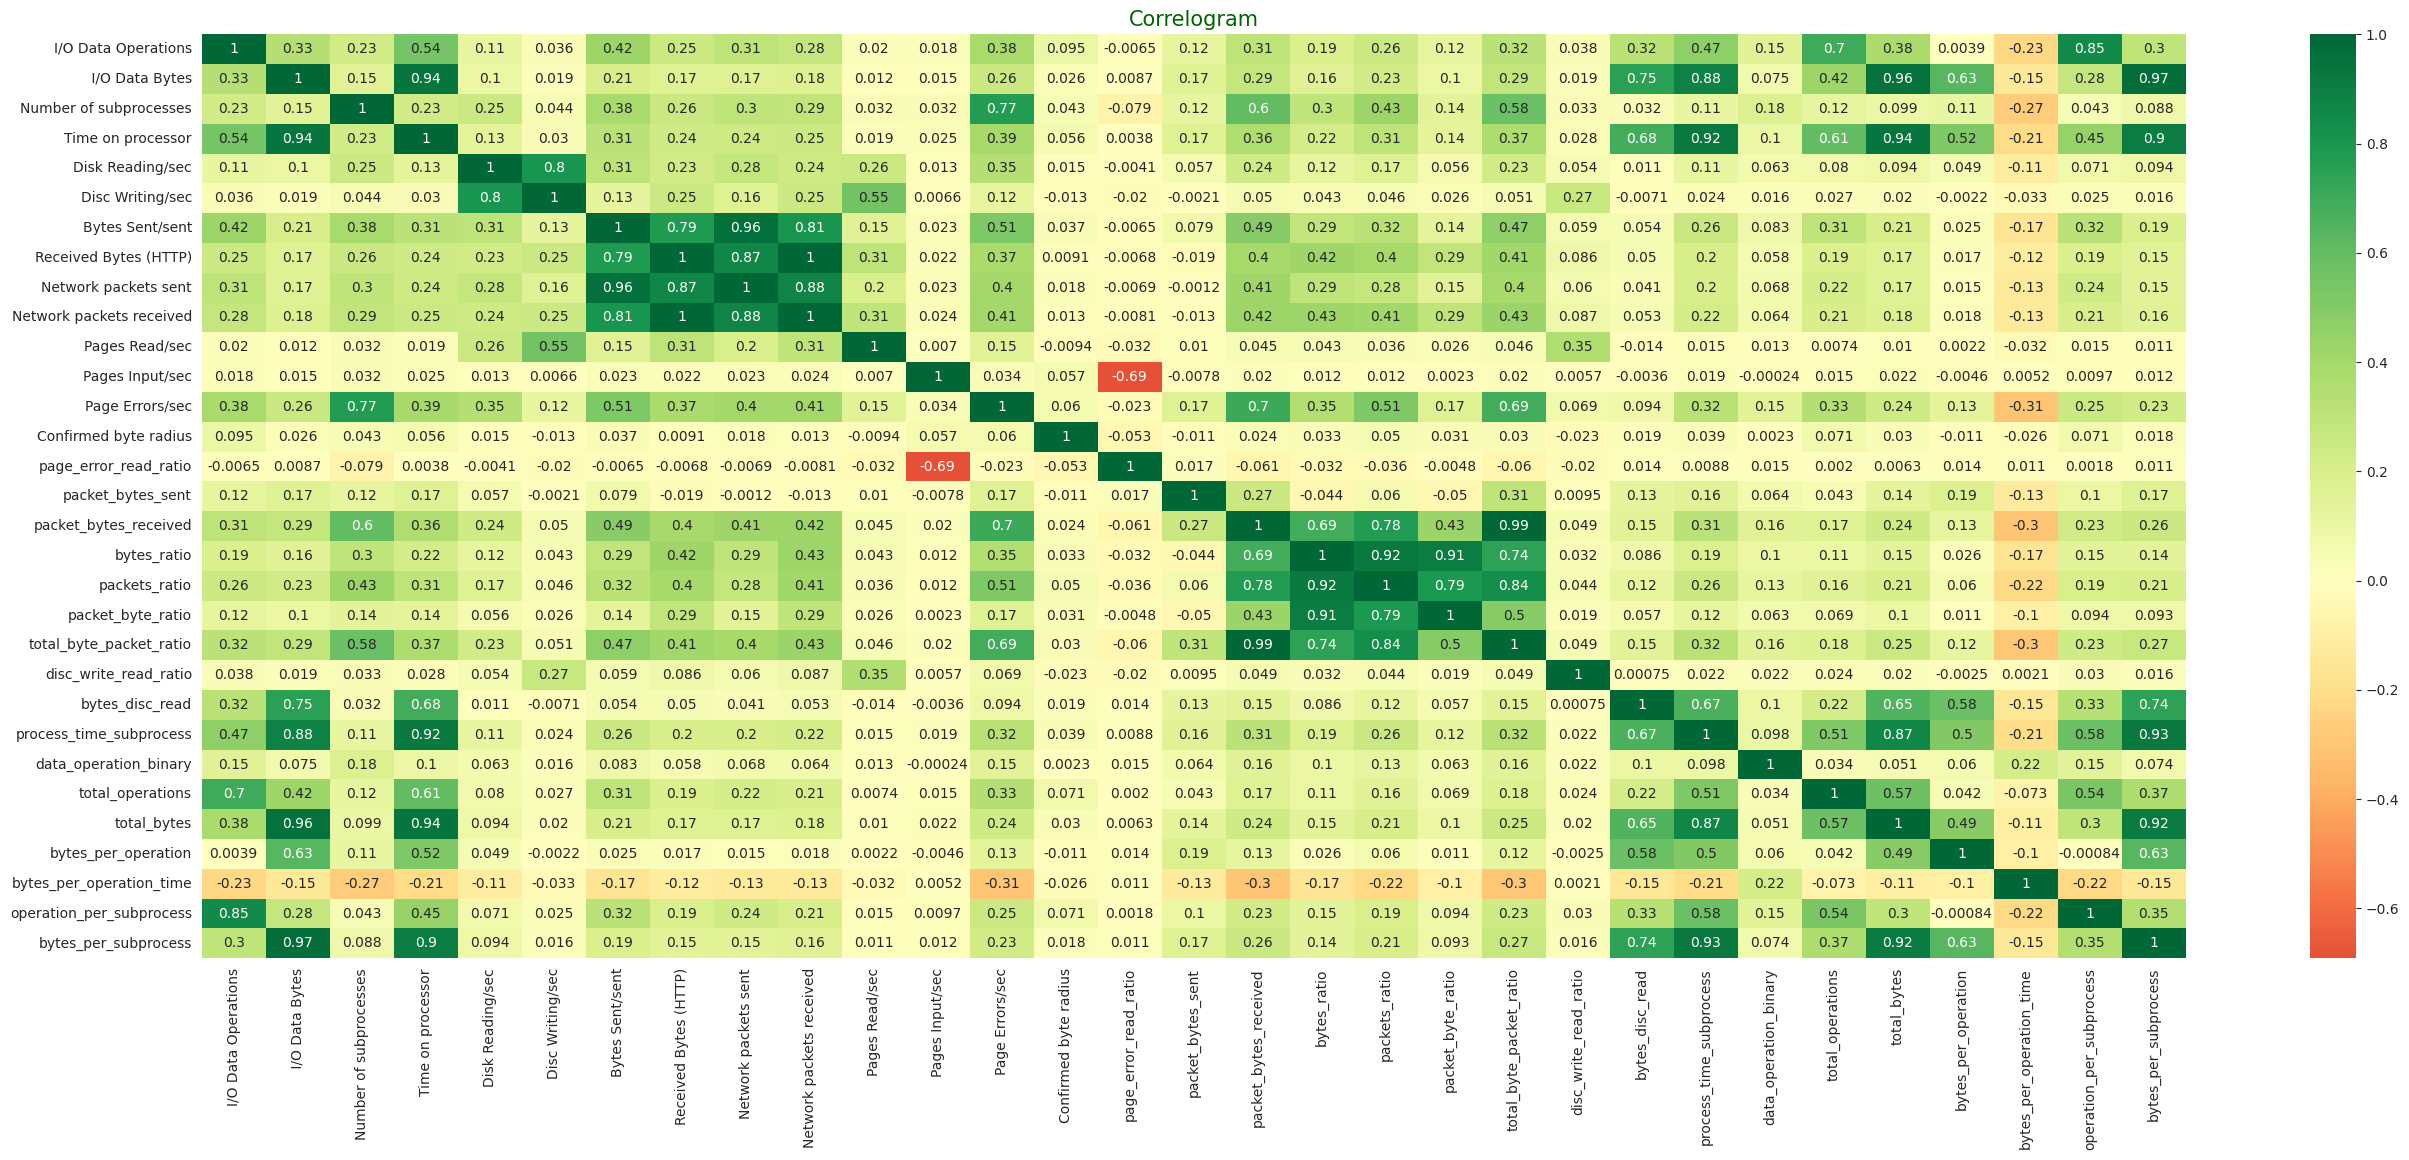

In [21]:
# Plotting a heatmap to show correlations between variables
corr = X.corr()
plt.figure(figsize = (32, 12))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

<a name="Preprocess"></a>
# 7. *Preprocess*

In [22]:
# split train data into train and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=SEED)

In [23]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((7126, 31), (1782, 31), (7126,), (1782,))

In [24]:
X_train.describe()

,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,...,disc_write_read_ratio,bytes_disc_read,process_time_subprocess,data_operation_binary,total_operations,total_bytes,bytes_per_operation,bytes_per_operation_time,operation_per_subprocess,bytes_per_subprocess
count,7126.000000,7.126000e+03,7126.000000,7126.000000,7126.000000,7126.000000,7126.000000,7.126000e+03,7126.000000,7126.000000,...,7126.000000,7126.000000,7126.000000,7126.000000,7126.000000,7.126000e+03,7126.000000,7.126000e+03,7126.000000,7126.000000
mean,36.118817,1.132369e+05,29.796610,0.494019,5.272275,0.992195,560.622563,1.670944e+04,4.817829,12.714468,...,0.057591,18735.799801,0.015533,0.904855,83.069969,7.896021e+05,2905.593724,3.188367e+08,1.193297,3543.040847
std,75.228982,4.908033e+05,5.712429,1.589856,17.025364,13.965568,2026.259182,9.655167e+04,22.059485,65.180040,...,0.660204,58762.117272,0.051494,0.293435,801.585258,5.017965e+06,15652.121166,4.660537e+08,2.553920,15459.327588
min,0.000000,0.000000e+00,1.000000,0.000000,0.066644,0.000000,1.197890,1.554938e+00,0.022183,0.022183,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,1.310934,7.314755e+02,27.000000,0.000000,0.755336,0.000000,33.892787,2.717776e+01,0.399975,0.333215,...,0.000000,315.047619,0.000000,1.000000,0.000000,0.000000e+00,216.299560,1.050299e+03,0.046053,25.644000
50%,11.440580,4.823292e+03,28.000000,0.034734,1.666663,0.000000,67.474267,8.963751e+01,0.710994,0.622442,...,0.000000,2358.024596,0.001387,1.000000,0.348618,1.406434e+02,354.266040,7.353256e+03,0.406562,167.028310
75%,33.166246,3.885232e+04,30.000000,0.451292,5.799176,0.022229,220.864802,5.580827e+02,1.533158,1.711622,...,0.007194,8664.563488,0.011575,1.000000,16.429978,9.256729e+03,1068.390641,1.000000e+09,1.084326,1360.428824
max,1795.316255,4.677280e+06,51.000000,25.246148,1064.819285,831.503948,98097.784300,4.812144e+06,1118.878021,3183.701036,...,31.635593,997976.371667,1.110999,1.000000,45324.820742,9.976641e+07,264562.459487,1.000000e+09,76.674420,144657.020750


In [25]:
X_train.sample(3)

,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,...,disc_write_read_ratio,bytes_disc_read,process_time_subprocess,data_operation_binary,total_operations,total_bytes,bytes_per_operation,bytes_per_operation_time,operation_per_subprocess,bytes_per_subprocess
8181,7.732019,1732.505451,27.0,0.000000,0.355495,0.000000,29.172818,10.176048,0.244403,0.111092,...,0.000000,4873.499995,0.00000,1,0.000000,0.000000,224.068966,1.000000e+09,0.286371,64.166869
6683,7.221590,3236.694358,28.0,0.000000,1.266556,0.000000,116.278707,166.540973,1.244335,1.066573,...,0.000000,2555.508772,0.00000,1,0.000000,0.000000,448.196923,1.000000e+09,0.257914,115.596227
3667,407.999280,63014.175380,29.0,1.632118,1.511273,0.022225,104.366740,211.289310,0.888984,0.844535,...,0.014706,41696.088222,0.05628,1,665.903147,102846.597367,154.446781,9.462964e+01,14.068941,2172.902599


In [26]:
# Count the number of samples in each class
count_class_0 = sum(y_train == 0)
count_class_1 = sum(y_train == 1)

# Ratio between class 0 and class 1
class_ratio = count_class_0 / count_class_1

In [27]:
# Apply a scaling factor to balance the classes
weight = 3 * class_ratio

<a name="Modeling"></a>
# 8. *Modeling*

In [28]:
import xgboost as xgb
from sklearn.metrics import classification_report, f1_score, confusion_matrix


# XGBoost Classifier
model = xgb.XGBClassifier(
    max_depth=6,
    learning_rate=0.05,
    n_estimators=1500,
    objective="binary:logistic",
    booster="gbtree",
    n_jobs=-1,
    min_child_weight=0.6,
    disable_default_eval_metric= 1,
    scale_pos_weight=weight,
    reg_lambda=0.5,
    random_state=SEED
)

# Fit model
model.fit(X_train, y_train)

# Prediction
preds = model.predict(X_val)

# Model Evaluation
print(classification_report(y_val, preds))

print("F1_score: ", f1_score(y_val, preds))

print("\nConfusion Matrix: \n", confusion_matrix(y_val, preds))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1301
           1       0.97      0.96      0.96       481

    accuracy                           0.98      1782
   macro avg       0.98      0.97      0.98      1782
weighted avg       0.98      0.98      0.98      1782

F1_score:  0.964509394572025

Confusion Matrix: 
 [[1286   15]
 [  19  462]]


In [29]:
importance = model.feature_importances_

# for better visualization
import pandas as pd
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importance_df)

                     Feature  Importance
0        I/O Data Operations    0.230941
2     Number of subprocesses    0.075895
16     packet_bytes_received    0.067046
4           Disk Reading/sec    0.066705
29  operation_per_subprocess    0.059051
27       bytes_per_operation    0.052673
28  bytes_per_operation_time    0.047251
26               total_bytes    0.045168
13     Confirmed byte radius    0.029782
3          Time on processor    0.026468
30      bytes_per_subprocess    0.025868
7      Received Bytes (HTTP)    0.023553
1             I/O Data Bytes    0.021429
23   process_time_subprocess    0.020146
12           Page Errors/sec    0.020022
20   total_byte_packet_ratio    0.019669
15         packet_bytes_sent    0.019409
6            Bytes Sent/sent    0.017202
22           bytes_disc_read    0.017053
5           Disc Writing/sec    0.016127
8       Network packets sent    0.015461
14     page_error_read_ratio    0.014610
25          total_operations    0.013042
10            Pa

<a name="submit"></a>
# 9. *Submission*

In [30]:
# Get the features used during training
train_features = X_train.columns

# Select the same features from the test data, ensuring the order is the same
test_data_for_prediction = test[train_features]

test['Target'] = model.predict(test_data_for_prediction)

sub = test[['ID', 'Target']]
sub.to_csv('submission.csv', index=False)
print("submission.csv is generated. You can go to Zindi to make submission.")

submission.csv is generated. You can go to Zindi to make submission.
